# Tasks for laboratory assignment 1

In [1]:
# imports section

import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
from datetime import datetime
import csv
import numpy as np
import matplotlib.pyplot as plt

## Extract webpage data given the url

Create a Python script that performs basic web scraping on a page to extract all the information into text and returns it as a string.
String should not contain tags.

In [2]:
def parse_web_page(url):
    """
    Fetch the content of the given web page.

    Args:
        url (str): The URL of the web page to fetch.

    Returns:
        str: The content of the page as a string.

    Raises:
        HTTPError: If the HTTP request returned an unsuccessful status code.
    """
    try:
        response = requests.get(url)
        response.raise_for_status()  # Will raise an HTTPError for bad responses
        soup = BeautifulSoup(response.content, 'html.parser')
        return soup.get_text()  # Get all the text from the page
    except requests.exceptions.RequestException as e:
        print(f"Error fetching page: {e}")
        return None

print(parse_web_page('https://fmi.chnu.edu.ua/')[:255])
print(parse_web_page('https://en.wikipedia.org/wiki/Web_scraping')[:255])






Головна - Факультет математики та інформатики




















































Перейти до основного вмісту






[email protected]



                58012, Україна, м. Чернівці, вул. Університетська, 28
            

















Web scraping - Wikipedia



























Jump to content







Main menu





Main menu
move to sidebar
hide



		Navigation
	


Main pageContentsCurrent eventsRandom articleAbout WikipediaContact us





		Contribute
	


HelpLearn to edit


## Get data from the API

Create a python script that performs basic request to API endpoint and saves that data to a JSON file `result.json`.

In [3]:
def parse_api(api_url):
    """
    Fetch the data of the given API endpoint and save it to result.json.

    Args:
        api_url (str): The URL of the API endpoint.

    Returns:
        None.

    Raises:
        HTTPError: If the HTTP request returned an unsuccessful status code.
    """
    try:
        response = requests.get(api_url)
        response.raise_for_status()  # Check if request was successful
        data = response.json()  # Parse JSON response
        with open('result.json', 'w') as json_file:
            json.dump(data, json_file, indent=4)  # Save JSON data to file
    except requests.exceptions.RequestException as e:
        print(f"Error fetching API data: {e}")

parse_api('https://api.github.com/')

## Parse the json file

Parse the `weather.json` file and return weather data for a specific date, that is given as a parameter. Return the data as an array.

In [5]:
def parse_json(date):
    """
    Parse the data from weather.json file and return weather data for a given date.

    Args:
        date (str): The date for which we look up the weather.

    Returns:
        list: a list of weather data for a given date.
    """
    with open('resources/weather.json', 'r') as file:
        data = json.load(file)
        # Access the 'daily' key which contains the list of weather data
        weather_data = [entry for entry in data['daily'] if entry['date'] == date]
        return weather_data
    
target_date = '2024-08-19'
print(parse_json(target_date))

[{'date': '2024-08-19', 'max_temperature': 30.0, 'min_temperature': 21.0, 'precipitation': 5.0, 'wind_speed': 10.0, 'humidity': 70, 'weather_description': 'Light rain'}]


## Parse the csv file

Parse the `weather.csv` file and return weather data for a specific date, that is given as a parameter. Return the data as an array.

In [7]:
def parse_csv(date):
    """
    Parse the data from weather.csv file and return weather data for a given date.

    Args:
        date (str): The date for which we look up the weather.

    Returns:
        list: a list of weather data for a given date.
    """
    with open('resources/weather.csv', 'r') as file:
        reader = csv.DictReader(file)
        # Check column names to ensure they're as expected
        print(reader.fieldnames)  # This will print the column headers
        # Strip any extra spaces from column names
        weather_data = [row for row in reader if row['CET'] == date]
        return weather_data
    
target_date = '1997-5-22'
print(parse_csv(target_date))

['CET', 'Max TemperatureC', 'Mean TemperatureC', 'Min TemperatureC', 'Dew PointC', 'MeanDew PointC', 'Min DewpointC', 'Max Humidity', ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressurehPa', ' Mean Sea Level PressurehPa', ' Min Sea Level PressurehPa', ' Max VisibilityKm', ' Mean VisibilityKm', ' Min VisibilitykM', ' Max Wind SpeedKm/h', ' Mean Wind SpeedKm/h', ' Max Gust SpeedKm/h', 'Precipitationmm', ' CloudCover', ' Events', 'WindDirDegrees']
[{'CET': '1997-5-22', 'Max TemperatureC': '25', 'Mean TemperatureC': '18', 'Min TemperatureC': '10', 'Dew PointC': '11', 'MeanDew PointC': '8', 'Min DewpointC': '6', 'Max Humidity': '88', ' Mean Humidity': '54', ' Min Humidity': '34', ' Max Sea Level PressurehPa': '1017', ' Mean Sea Level PressurehPa': '1015', ' Min Sea Level PressurehPa': '1012', ' Max VisibilityKm': '10', ' Mean VisibilityKm': '10', ' Min VisibilitykM': '10', ' Max Wind SpeedKm/h': '11', ' Mean Wind SpeedKm/h': '3', ' Max Gust SpeedKm/h': '', 'Precipitationmm': '0.00',

## Visualize data

Visualize the `weather.csv` data using matplotlib. Choose your own approach to data visualization. Save the results (as `.png`, `.webp` files etc., your choise) in this repository. 

Index(['CET', 'Max TemperatureC', 'Mean TemperatureC', 'Min TemperatureC',
       'Dew PointC', 'MeanDew PointC', 'Min DewpointC', 'Max Humidity',
       ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressurehPa',
       ' Mean Sea Level PressurehPa', ' Min Sea Level PressurehPa',
       ' Max VisibilityKm', ' Mean VisibilityKm', ' Min VisibilitykM',
       ' Max Wind SpeedKm/h', ' Mean Wind SpeedKm/h', ' Max Gust SpeedKm/h',
       'Precipitationmm', ' CloudCover', ' Events', 'WindDirDegrees'],
      dtype='object')


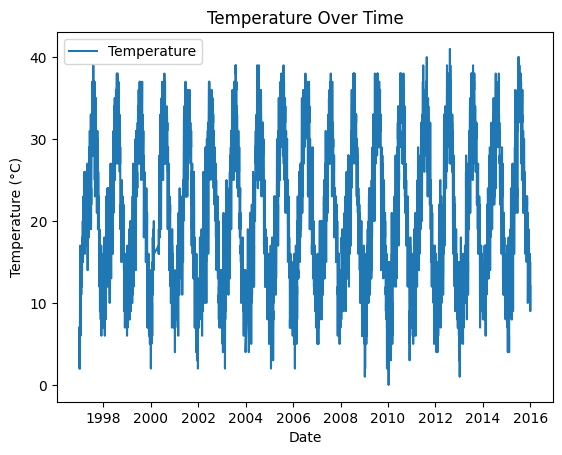

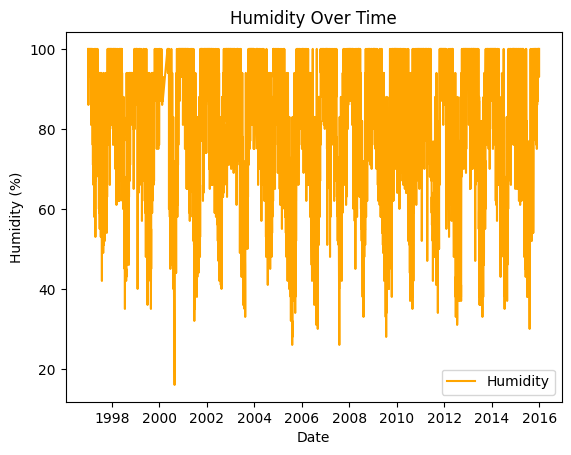

In [8]:
def visualize_data():
    """
    Parse the data from weather.csv file and visualize it using Matplotlib. Use more then one visualization. 
    Save the results in the repository.

    Args:
        None: None.

    Returns:
        None: None.
    """
    df = pd.read_csv('resources/weather.csv')

    print(df.columns)

    df['date'] = pd.to_datetime(df['CET']) 
    plt.plot(df['date'], df['Max TemperatureC'], label='Temperature')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.title('Temperature Over Time')
    plt.legend()
    plt.savefig('temperature_plot.png') 

    plt.figure()
    plt.plot(df['date'], df['Max Humidity'], label='Humidity', color='orange')
    plt.xlabel('Date')
    plt.ylabel('Humidity (%)')
    plt.title('Humidity Over Time')
    plt.legend()
    plt.savefig('humidity_plot.png')

visualize_data()